We will separate caterigocial columns into ordinal and cardinal, then give ranking to ordinal and  one hot incoding to cardinal and see result

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [190]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [191]:
train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


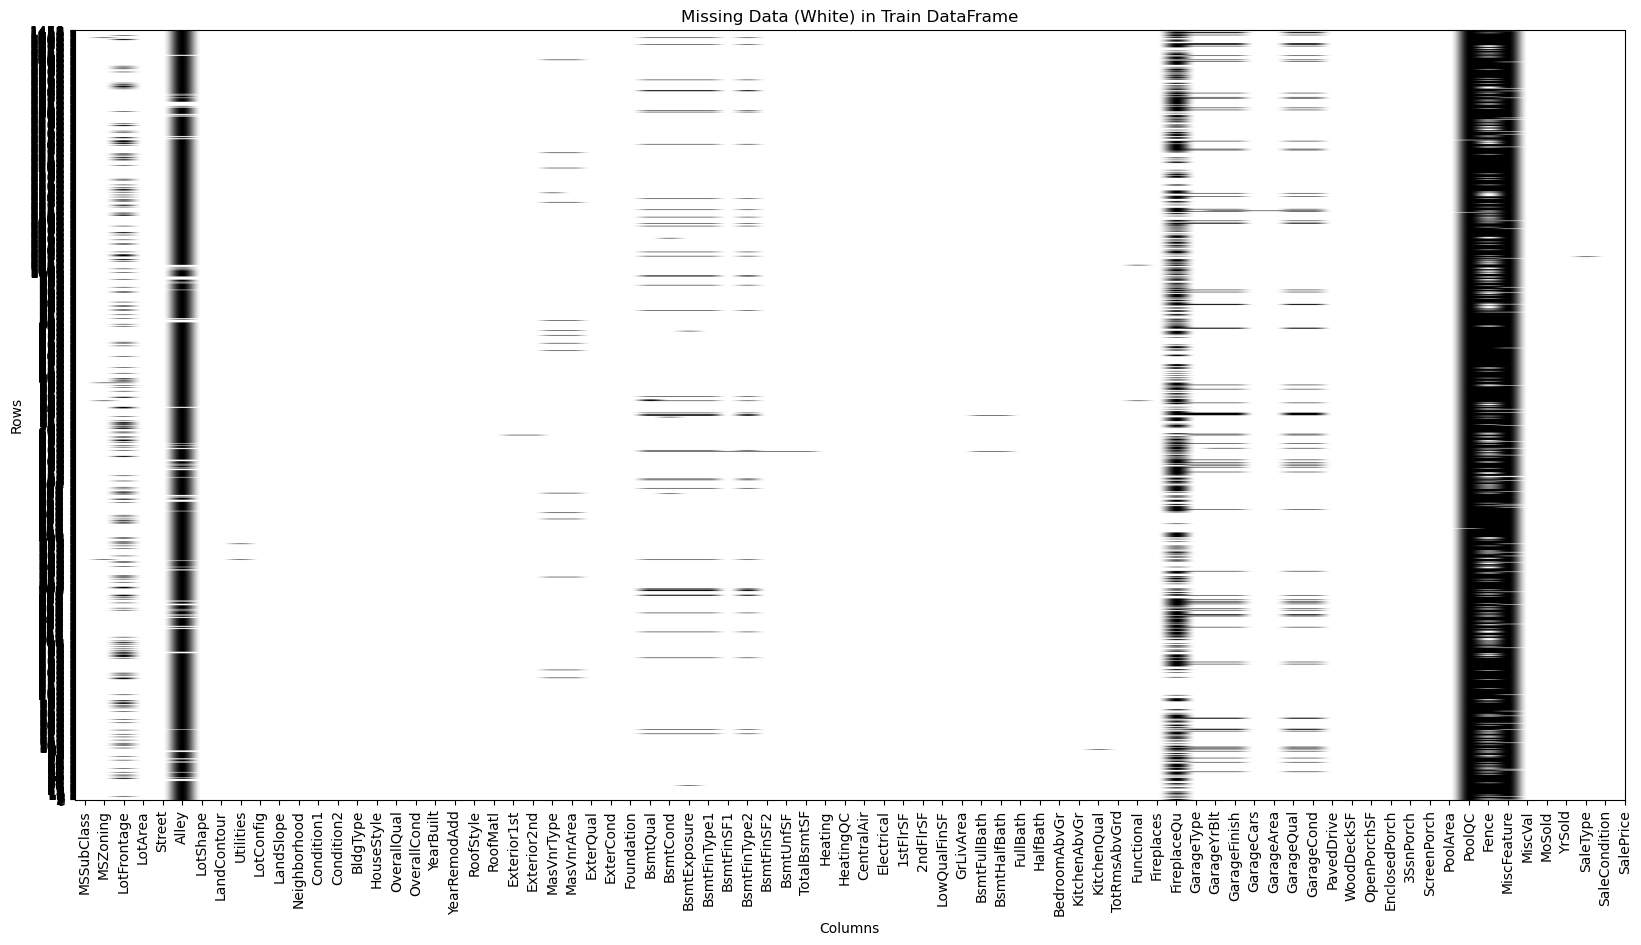

In [192]:
data = test.isnull().values.astype(int)  # Convert NaN values to 1, non-NaN values to 0
plt.figure(figsize=(20, 10))  # Larger figure size
plt.imshow(data, cmap='binary', aspect='auto')
plt.gca().invert_yaxis()  # Invert y-axis to match DataFrame layout
plt.xticks(range(len(train.columns)), train.columns, rotation=90)
plt.yticks(range(len(train)), range(len(train)))
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Data (White) in Train DataFrame')
plt.grid(False)  # Turn off grid
plt.show()

In [193]:
n = test.isnull().sum()
print(n.to_string())

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [194]:
# We find that values of few columns are missing, specially Alley, FireplaceQU,PoolQC, Fence, MiscFeature

Project planing:
a) simple model
1)First lets divide columns in numerical and categorical,
2)scaling numerical and one hot encode categorical.
3)using models which ignore null values.
find r2 score
    

In [195]:
# It is very big data and we have to treat every column, but lets first separate the colums based on categorical(ordinal & cardinal) and numerical
# then lets do one hot encoding 

In [196]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [197]:
numerical = ['LotFrontage','LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
             'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea','MiscVal',
             'MoSold', 'YrSold','OverallQual', 'OverallCond']

In [198]:
cardinal = ['RoofMatl','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
               'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                'Foundation',  'Heating','GarageType', 'MiscFeature','SaleType', 'SaleCondition','BsmtFinType1',
            'BsmtFinType2']

In [199]:
ordinal = ['LotConfig','LandSlope','ExterQual', 'ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure', 'HeatingQC','CentralAir','Electrical',
           'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual', 'GarageCond','PavedDrive',
           'PoolQC','Fence']

In [200]:
#removing missing values in numerical columns

In [201]:
train['LotFrontage_nan'] = np.where(train['LotFrontage'].isnull(), 1, 0)
train['BsmtQual_nan'] = np.where(train['BsmtQual'].isnull(), 1, 0)
train['BsmtFinType1_nan'] = np.where(train['BsmtFinType1'].isnull(), 1, 0)

In [202]:
test['LotFrontage_nan'] = np.where(test['LotFrontage'].isnull(), 1, 0)
test['BsmtQual_nan'] = np.where(test['BsmtQual'].isnull(), 1, 0)
test['BsmtFinType1_nan'] = np.where(test['BsmtFinType1'].isnull(), 1, 0)

In [203]:
median_values = train.median()
train[numerical] = train[numerical].fillna(median_values)
test[numerical] = test[numerical].fillna(median_values)

/var/folders/1x/5gvchf9n2rggz1tvjvsdmq300000gn/T/ipykernel_7325/252466635.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = train.median()


In [204]:
#replacing missing values in categorical columns
train = train.fillna('data_missing')

In [205]:
test = test.fillna('data_missing')

In [206]:
# # Plotting box plots for each categorical variable
# plt.figure(figsize=(20, 50))
# for i, cat in enumerate(cardinal, 1):
#     plt.subplot(15, 3, i)
#     sns.boxplot(x=cat, y='SalePrice', data=train)
#     plt.title(f"{cat} vs SalePrice")
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [207]:
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories for each ordinal feature
ordinal_mapping = {

    'LotConfig': [ 'Inside', 'Corner', 'CulDSac','FR2', 'FR3'],
    'LandSlope':['Gtl','Mod','Sev'],
    'ExterQual': ['Ex','Gd','TA','Fa','Po'],
    'ExterCond': ['Ex','Gd','TA','Fa','Po'],
    'BsmtQual': ['Ex','Gd','TA','Fa','Po','NA','data_missing'],
    'BsmtCond': ['Ex','Gd','TA','Fa','data_missing','Po','NA'],
    'BsmtExposure':['Gd','Av','Mn','No','NA','data_missing'],
    'HeatingQC': ['Ex','Gd','TA','Fa','Po'],
    'CentralAir':['N','Y'],
    'Electrical': ['SBrkr','FuseA','FuseF','FuseP','Mix','data_missing'],
    'KitchenQual': ['Ex','Gd','TA','Fa','Po','data_missing'],
    'Functional': ['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal','data_missing'],
    'FireplaceQu': ['Ex','Gd','TA','Fa','Po','NA','data_missing'],
    'GarageFinish': ['Fin','RFn','Unf','NA','data_missing'],
    'GarageQual': ['Ex','Gd','TA','Fa','Po','NA','data_missing'],
    'GarageCond': ['Ex','Gd','TA','Fa','Po','NA','data_missing'],
    'PavedDrive': ['Y','P','N'],
    'PoolQC':['Ex','Gd','TA','Fa','Po','NA','data_missing'],
    'Fence':['GdPrv','MnPrv','GdWo','MnWw','NA','data_missing']
}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal])
train[ordinal] = encoder.fit_transform(train[ordinal])

# Display the encoded DataFrame
train[ordinal]

,LotConfig,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,6.0,1.0,2.0,2.0,0.0,6.0,5.0
2,3.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,6.0,5.0
3,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,6.0,5.0
4,1.0,0.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,6.0,5.0
5,3.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.0,0.0,2.0,2.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,6.0,5.0
1457,0.0,0.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,6.0,1.0
1458,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,6.0,0.0


In [208]:
test[ordinal] = encoder.transform(test[ordinal])

In [209]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting
# plt.figure(figsize=(20, 30))
# for i, col in enumerate(c):
#     plt.subplot(7, 3, i+1)
#     sns.boxplot(x=train[col], y=train['SalePrice'], palette='viridis', order=ordinal_mapping[col])
#     plt.title(f'{col} vs SalePrice')
#     plt.ylabel('SalePrice')
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [210]:
from sklearn.preprocessing import StandardScaler

# Assuming 'train' is your DataFrame and 'numerical' is your list of numerical column names
scaler = StandardScaler()
train[numerical+ordinal] = scaler.fit_transform(train[numerical+ordinal])
test[numerical+ordinal] = scaler.transform(test[numerical+ordinal])
# Display the scaled DataFrame
train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,BsmtQual_nan,BsmtFinType1_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,-0.220875,-0.207142,Pave,data_missing,Reg,Lvl,AllPub,-0.538603,...,data_missing,-0.087688,-1.599111,0.138777,WD,Normal,208500,0,0,0
2,20,RL,0.460320,-0.091886,Pave,data_missing,Reg,Lvl,AllPub,3.341462,...,data_missing,-0.087688,-0.489110,-0.614439,WD,Normal,181500,0,0,0
3,60,RL,-0.084636,0.073480,Pave,data_missing,IR1,Lvl,AllPub,-0.538603,...,data_missing,-0.087688,0.990891,0.138777,WD,Normal,223500,0,0,0
4,70,RL,-0.447940,-0.096897,Pave,data_missing,IR1,Lvl,AllPub,0.754752,...,data_missing,-0.087688,-1.599111,-1.367655,WD,Abnorml,140000,0,0,0
5,60,RL,0.641972,0.375148,Pave,data_missing,IR1,Lvl,AllPub,3.341462,...,data_missing,-0.087688,2.100892,0.138777,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,-0.357114,-0.260560,Pave,data_missing,Reg,Lvl,AllPub,-0.538603,...,data_missing,-0.087688,0.620891,-0.614439,WD,Normal,175000,0,0,0
1457,20,RL,0.687385,0.266407,Pave,data_missing,Reg,Lvl,AllPub,-0.538603,...,data_missing,-0.087688,-1.599111,1.645210,WD,Normal,210000,0,0,0
1458,70,RL,-0.175462,-0.147810,Pave,data_missing,Reg,Lvl,AllPub,-0.538603,...,Shed,4.953112,-0.489110,1.645210,WD,Normal,266500,0,0,0


In [211]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_test = test

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa

from sklearn.metrics import mean_squared_error


X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [213]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cardinal])
X_cv_encoded = encoder.transform(X_cv[cardinal])
X_test_encoded = encoder.transform(X_test[cardinal])

/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [214]:
# Get the column names for the one-hot encoded features
encoded_feature_names = encoder.get_feature_names_out(cardinal)

# Create DataFrames from the encoded arrays
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names,index = X_train.index)
X_cv_encoded_df = pd.DataFrame(X_cv_encoded, columns=encoded_feature_names,index = X_cv.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names,index = X_test.index)

In [215]:
# Concatenate the encoded categorical columns with the numerical columns
X_train = pd.concat([X_train_encoded_df, X_train[numerical+ordinal]],axis=1)
X_cv = pd.concat([X_cv_encoded_df, X_cv[numerical+ordinal]], axis=1)
X_test = pd.concat([X_test_encoded_df, X_test[numerical+ordinal]] ,axis=1)


In [216]:
X_test

,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.274148,0.771091,-0.237044,1.026663,0.647645,-0.260437,-0.262602,-0.289745,0.067388,-2.042560
1462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.274148,-0.735994,-0.237044,1.026663,0.647645,-0.260437,-0.262602,-0.289745,0.067388,0.477734
1463,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274148,0.771091,-0.237044,-0.718814,-1.314101,-0.260437,-0.262602,-0.289745,0.067388,-2.042560
1464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274148,-0.735994,-0.237044,-1.155183,-1.314101,-0.260437,-0.262602,-0.289745,0.067388,0.477734
1465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274148,-0.735994,-0.237044,1.026663,-0.333228,-0.260437,-0.262602,-0.289745,0.067388,0.477734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274148,0.771091,-0.237044,1.026663,2.609390,3.988037,3.997381,-0.289745,0.067388,0.477734
2916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274148,0.771091,-0.237044,1.026663,0.647645,-0.260437,-0.262602,-0.289745,0.067388,0.477734
2917,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.274148,0.771091,-0.237044,-0.718814,0.647645,-0.260437,-0.262602,-0.289745,0.067388,0.477734


In [29]:
# List of algorithms
algorithms = [
    HistGradientBoostingRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    AdaBoostRegressor(),
    ExtraTreesRegressor(),
    GaussianProcessRegressor(),
    KernelRidge(),
    MLPRegressor(),
    XGBRegressor(),


]


# Loop through each algorithm
for algo in algorithms:
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_cv)
    r2 = r2_score(y_cv, y_pred)
    print(f"{algo.__class__.__name__}: R2 Score = {r2}")


HistGradientBoostingRegressor: R2 Score = 0.8875336776913004
LinearRegression: R2 Score = -4.889074534995196e+19
DecisionTreeRegressor: R2 Score = 0.7915162153955143
RandomForestRegressor: R2 Score = 0.8909372578707102
GradientBoostingRegressor: R2 Score = 0.9033905873258695
SVR: R2 Score = -0.024051978121161666
KNeighborsRegressor: R2 Score = 0.8025983206643892
Ridge: R2 Score = 0.8772198351698091
Lasso: R2 Score = 0.8864922140965905
ElasticNet: R2 Score = 0.83014259002094


C:\Users\USER\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


AdaBoostRegressor: R2 Score = 0.8370655323220921
ExtraTreesRegressor: R2 Score = 0.8899303272659984
GaussianProcessRegressor: R2 Score = -4.0808658605850425
KernelRidge: R2 Score = 0.8771071608604912


C:\Users\USER\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: R2 Score = -3.8121344337372607
XGBRegressor: R2 Score = 0.9011961558736494


In [30]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [31]:
model = GradientBoostingRegressor()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of algorithms with hyperparameters for tuning
algorithms = [
    (LinearRegression(), {}),
    (DecisionTreeRegressor(), {'max_depth': [3, 5, 7]}),
    (RandomForestRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}),
    (GradientBoostingRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
    (SVR(), {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}),
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    (Ridge(), {'alpha': [0.1, 1, 10]}),
    (Lasso(), {'alpha': [0.1, 1, 10]}),
    (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}),
    (AdaBoostRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}),
    (ExtraTreesRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}),
    (GaussianProcessRegressor(), {}),
    (KernelRidge(), {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}),
    (MLPRegressor(), {'hidden_layer_sizes': [(50,), (100,), (150,)], 'activation': ['relu', 'tanh']}),
    (XGBRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
]


# Loop through each algorithm
for algo, param_grid in algorithms:
    grid_search = GridSearchCV(estimator=algo, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_cv)
    r2 = r2_score(y_cv, y_pred)
    print(f"{algo.__class__.__name__}: Best Parameters - {grid_search.best_params_}, Best R2 Score - {r2}")


LinearRegression: Best Parameters - {}, Best R2 Score - -4.889074534995196e+19
DecisionTreeRegressor: Best Parameters - {'max_depth': 5}, Best R2 Score - 0.7977095950399475
RandomForestRegressor: Best Parameters - {'max_depth': 7, 'n_estimators': 100}, Best R2 Score - 0.8819975630083962
GradientBoostingRegressor: Best Parameters - {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}, Best R2 Score - 0.8965560325327274
SVR: Best Parameters - {'C': 10, 'gamma': 0.1}, Best R2 Score - -0.024699704636428566
KNeighborsRegressor: Best Parameters - {'n_neighbors': 7}, Best R2 Score - 0.8076084960781126
Ridge: Best Parameters - {'alpha': 10}, Best R2 Score - 0.8691023944722385
Lasso: Best Parameters - {'alpha': 10}, Best R2 Score - 0.8883650668319911
ElasticNet: Best Parameters - {'alpha': 0.1, 'l1_ratio': 0.5}, Best R2 Score - 0.8612133469611724
AdaBoostRegressor: Best Parameters - {'learning_rate': 0.2, 'n_estimators': 150}, Best R2 Score - 0.853669690007963
ExtraTreesRegressor: Best P

C:\Users\USER\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Best Parameters - {'activation': 'relu', 'hidden_layer_sizes': (150,)}, Best R2 Score - -3.638486683046957
XGBRegressor: Best Parameters - {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}, Best R2 Score - 0.9077888101198636


In [ ]:
from tqdm import tqdm



# List of algorithms with hyperparameters for tuning
algorithms = [
   
#     (GradientBoostingRegressor(), {'n_estimators': [50,70, 100,120, 150,180,200,250,350], 'learning_rate': [0.01,.05, 0.09,.1,.13,.19, 0.2,.25,.3], 'max_depth': [1,2,3,4 ,5, 7,10,15]}),
#     (KernelRidge(), {'alpha': [.001,.05,.075,0.1,.15,.2,.3,.6, 1,2,5, 10], 'kernel': ['linear', 'poly', 'rbf']}),
    (XGBRegressor(), {'n_estimators': [50, 150,200,250,300,325,350,375,400,450,500,600], 'learning_rate': [0.01,.05,.07,.08 ,0.09,.1,.13,.19, .25,.3], 'max_depth': [1,2,3,4 ,5, 7,10,15]}),
]

# Loop through each algorithm
for algo, param_grid in tqdm(algorithms):
    grid_search = GridSearchCV(estimator=algo, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_cv)
    r2 = r2_score(y_cv, y_pred)
    print(f"{algo.__class__.__name__}: Best Parameters - {grid_search.best_params_}, Best R2 Score - {r2}")

  0%|                                                     | 0/1 [00:00<?, ?it/s]

In [35]:
model = XGBRegressor(learning_rate= 0.09, max_depth= 3, n_estimators= 350)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['SalePrice'] = y_pred
submission


,id,SalePrice
0,1461,124985.250000
1,1462,156705.343750
2,1463,183096.781250
3,1464,193027.562500
4,1465,195356.015625
...,...,...
1454,2915,84145.945312
1455,2916,77539.046875
1456,2917,166201.187500
1457,2918,125376.257812


In [37]:
submission.to_csv('submission2.csv', index=False)